# CSE351 HW1: Exploratory Data Analysis
## NYC Airbnb 2019
**Iman Ali (112204305)**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

## Load the data
Data source: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [15]:
data = pd.read_csv('AB_NYC_2019.csv') # use pandas to load the data
data.head() # display first 5 rows of the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0



## Task 1 (Examine & Clean data)

Examine. First get a high level understanding of the data.

In [16]:
# A concise summary of the DataFrame. Check which properties are being represented and what their types are.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [17]:
# Generate descriptive statistics for all integer/float type properties.
data[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month', 
     'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [18]:
# Boroughs being represented 
pd.unique(data['neighbourhood_group'])

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Number of listings in each borough')

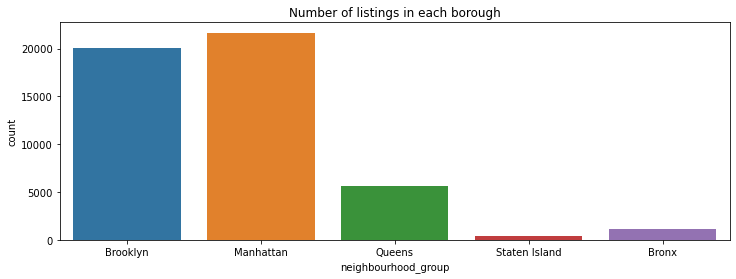

In [19]:
# Listings in each borough
plt.figure(figsize=(12,4))
sns.countplot(x="neighbourhood_group", data=data)
plt.title("Number of listings in each borough")

In [20]:
# Average price in each borough
grouped_data = data.groupby("neighbourhood_group")
grouped_data['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [21]:
# Number of hosts
len(pd.unique(data['host_id']))

37457

In [22]:
# Types of rooms
pd.unique(data['room_type'])

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [23]:
# Neighbourhood represented
pd.unique(data['neighbourhood'])

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Now we will clean the data by checking for outliers, missing values, abnormal values etc

## Data uniqueness and duplicates

In [24]:
# There are 48895 data entries. Ensure that each listing has a unique id.
data["id"].is_unique

True

In [25]:
# Confirm there are no duplicates in the data set
data.duplicated().any()

False

## Missing/Null Values

In [26]:
# Check missing values in the data.
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [27]:
# Entries with name, host name, or last_review fields missing (NaN) do not corrupt the data 
# because they are object types.
# However reviews_per_month is a float type and should not be NaN


# Analyze listings with missing reviews_per_month field
data[data.reviews_per_month.isna()][['id','name','reviews_per_month', 'number_of_reviews']]

,id,name,reviews_per_month,number_of_reviews
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,0
19,7750,Huge 2 BR Upper East Cental Park,NaN,0
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,NaN,0
36,11452,Clean and Quiet in Brooklyn,NaN,0
38,11943,Country space in the city,NaN,0
...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,NaN,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,NaN,0
48892,36485431,Sunny Studio at Historical Neighborhood,NaN,0
48893,36485609,43rd St. Time Square-cozy single bed,NaN,0


In [28]:
# We can confirm that all the listings where reviews_per_month field is NaN, have zero number_of_reviews.
# Therefore we can safely replace the NaN reviews_per_month to zero

data['reviews_per_month'] = data['reviews_per_month'].fillna(value=0)

In [29]:
# Certify reviews_per_month column NaN values have been replaced to zero

data.loc[data.number_of_reviews == 0, ['id','name','reviews_per_month', 'number_of_reviews']]

,id,name,reviews_per_month,number_of_reviews
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,0.0,0
19,7750,Huge 2 BR Upper East Cental Park,0.0,0
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,0.0,0
36,11452,Clean and Quiet in Brooklyn,0.0,0
38,11943,Country space in the city,0.0,0
...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,0.0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,0.0,0
48892,36485431,Sunny Studio at Historical Neighborhood,0.0,0
48893,36485609,43rd St. Time Square-cozy single bed,0.0,0


## Anomalies in Price (Detecting & treating outliers)

In [30]:
# General stats about the price
data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Price Range')

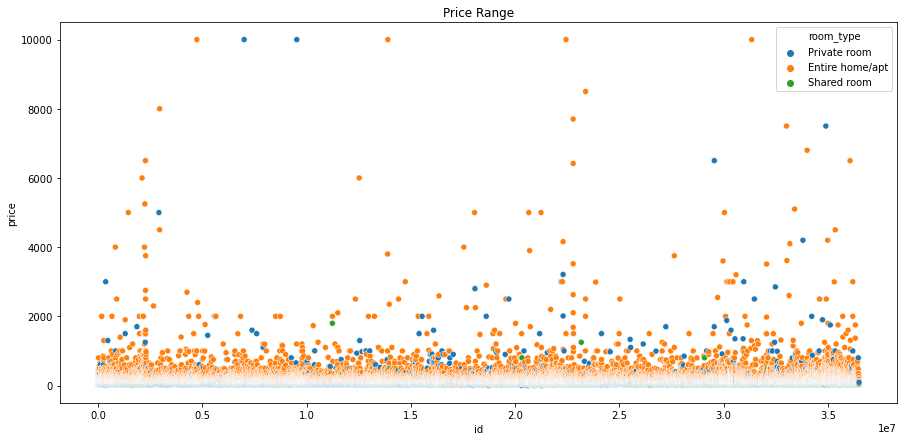

In [31]:
# Check the spread(range) of prices for outliers
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, x="id", y="price", hue="room_type")
plt.title("Price Range")

In [32]:
# Delete any listings where price is zero or negative (Eleven listings)
len(data[data.price == 0])

11

In [33]:
data.drop(data[data.price <= 0].index, inplace=True)
len(data[data.price == 0])

0

Text(0.5, 1.0, 'Price vs Room type')

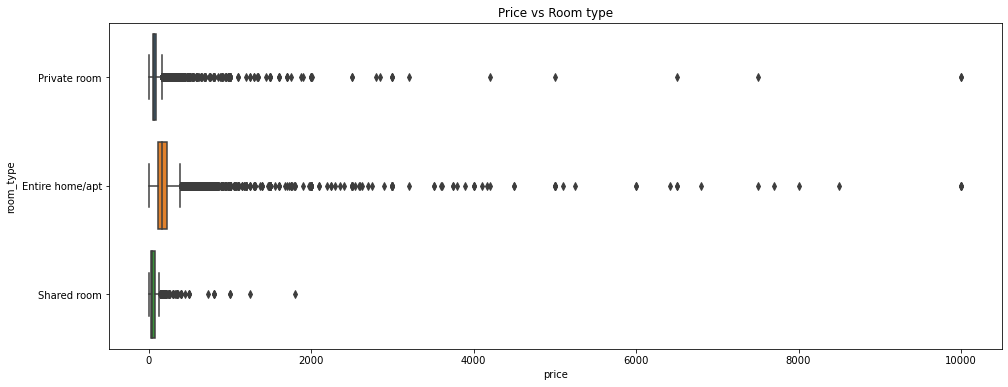

In [34]:
# Scatter plot shows data is quite evenly spread with most of the listings under $6000


# Analyze rooms with higher price tag (>= $6000) according to room type
plt.figure(figsize=(16,6))
sns.boxplot(data=data, x="price", y="room_type")
plt.title("Price vs Room type")

Text(0.5, 1.0, 'Price vs Borough')

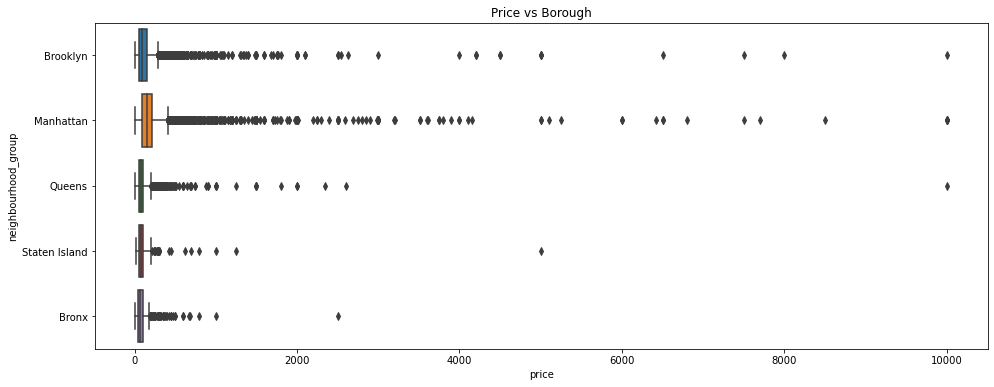

In [35]:
# Analyze rooms with higher price tag (>= $6000) according to area of listing (neighbourhood/borough)
plt.figure(figsize=(16,6))
sns.boxplot(data=data, x="price", y="neighbourhood_group")
plt.title("Price vs Borough")

In [36]:
# Most of the rooms with prices greater than 6000 are almost always entire home/apt in Manhattan or Brooklyn
# therefore justifying the high price tag
data[data.price >= 6000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,0.00,1,0
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
15560,12520066,Luxury townhouse Greenwich Village,66240032,Linda,Manhattan,Greenwich Village,40.73046,-73.99562,Entire home/apt,6000,1,0,NaN,0.00,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,0.00,1,83
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,0.00,12,146


In [37]:
# However, the box plot "Price vs Borough" does show an abormal outlier in Queens. 
# This outlier is priced at $10,000 (way more than other rooms in the area) 
# Further this is a 'private room' type with 0 availability and 100 day minimum stay.
# To me this seems like an error, therefore I will drop it.
pricey_rooms = data[data.price == 10000]
queens_outlier = pricey_rooms[pricey_rooms.neighbourhood_group=="Queens"]
data.drop(queens_outlier.index, inplace=True)

# However, replacing outliers with a median/mean value is a better approach.
# This method of treating outliers is known as mean/median imputation

## Anomalies in Availability

In [38]:
# General stats about the availability
data['availability_365'].describe()

count    48883.000000
mean       112.781806
std        131.627629
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

Text(0.5, 1.0, 'Availability in each Borough')

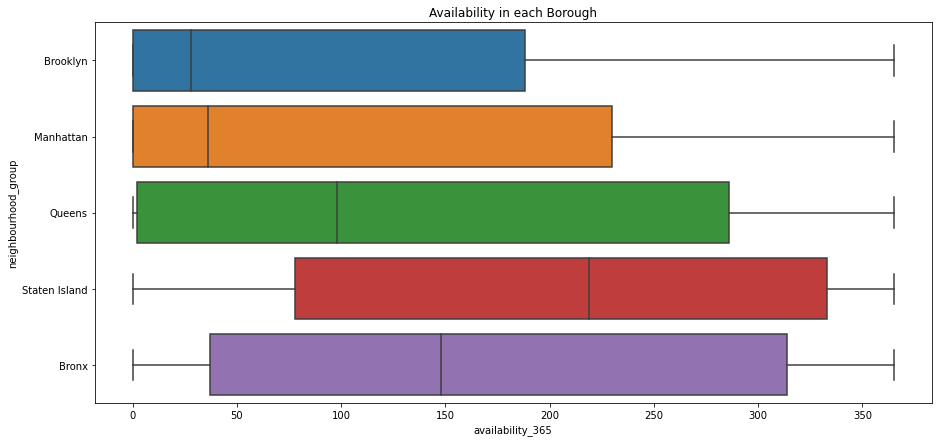

In [39]:
# Spread of data seems good with less availability in Manhattan and Brooklyn, 
# While Staten Island seems to have more rooms that go unoccupied

plt.figure(figsize=(15,7))
sns.boxplot(x=data.availability_365, y=data.neighbourhood_group)
plt.title("Availability in each Borough")

## Anomalies in Minimum Nights

In [40]:
# General stats about the min nights
data['minimum_nights'].describe()

count    48883.000000
mean         7.027985
std         20.508123
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Text(0.5, 1.0, 'Minimum nights data spread')

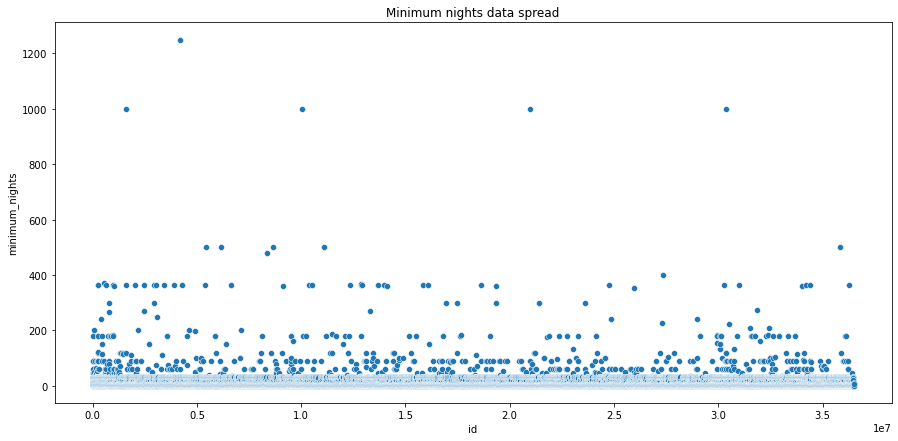

In [41]:
# Check for outliers in scatterplot
plt.figure(figsize=(15,7))
sns.scatterplot(x=data.id, y=data.minimum_nights)
plt.title("Minimum nights data spread")

In [42]:
# Some outliers with greater than 800 nights minimum stay
# However, they are very few in number and I will not delete them.
# They seem understandable due to their low prices and high availabilty rate.
data[data.minimum_nights > 800]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,0.00,1,365


## Anomalies in Reviews per Month

In [43]:
# General stats about reviews_per_month
data['reviews_per_month'].describe()

count    48883.000000
mean         1.090822
std          1.597222
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

Text(0.5, 1.0, 'Reviews per month data spread')

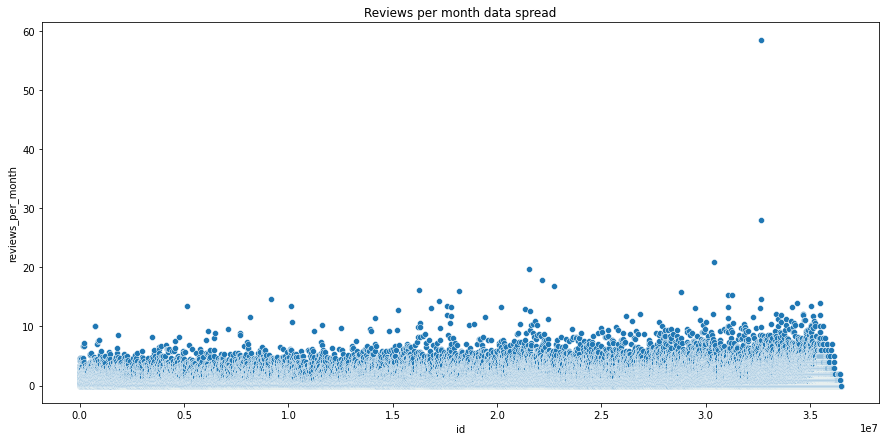

In [44]:
# Check for outliers in scatterplot
plt.figure(figsize=(15,7))
sns.scatterplot(x=data.id, y=data.reviews_per_month)
plt.title("Reviews per month data spread")

In [45]:
# One outlier found in the scatter plot
data[data.reviews_per_month > 40]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


In [46]:
# This seems like an error to me because this outlier has way more than average reviews
# Yet it has low occupancy rate with the room available 299 out of 365 days.
# That means this listing got guests for a total of 60 nights in the whole year
# So it cannot be getting 60 reviews per month


# I will use the mean imputation method to treat this outlier and replace its value with the average.
data.loc[data.reviews_per_month > 40, 'reviews_per_month'] = data['reviews_per_month'].mean()

In [47]:
# General stats after the outlier has been removed.
data['reviews_per_month'].describe()

count    48883.000000
mean         1.089647
std          1.575974
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         27.950000
Name: reviews_per_month, dtype: float64

## Task 2 Price vs Neighbourhood

### Part a) Find Top 5 and Bottom 5 neighborhood based on the price of the Airbnb

In [48]:
# First get data entries of only those neighbourhoods with more than 5 listings 
neighs = data[data.groupby('neighbourhood')['neighbourhood'].transform('size') > 5]
neighs

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


In [49]:
# Initially there were 221 neighbourhoods. 
len(data.groupby('neighbourhood'))

221

In [50]:
# After removing the ones with <=5 listings we have 190 neighbourhoods left
len(neighs.groupby('neighbourhood'))

190

Text(0.5, 1.0, 'Price vs Neighbourhood')

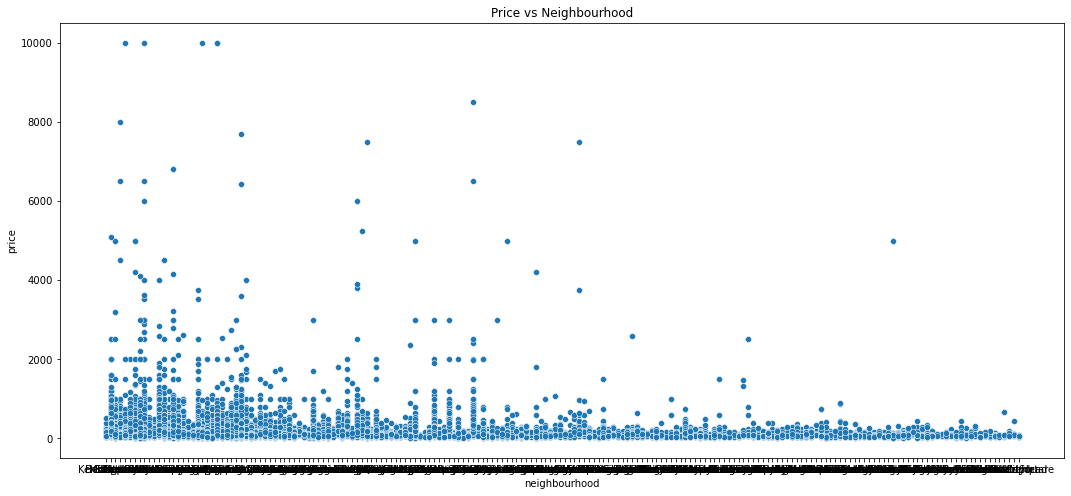

In [51]:
# Check the spread of data and detect outliers
plt.figure(figsize=(18,8))
sns.scatterplot(x=neighs.neighbourhood, y=neighs.price)
plt.title("Price vs Neighbourhood")

In [52]:
# Data has a skewed distribution and there are some outliers as seen above
# Therefore, get median statistics of each neighbourhood 
# Since median will be a better central tendancy measure here

stats=neighs.groupby('neighbourhood').median()
stats[['price', 'number_of_reviews', 'availability_365']]

,price,number_of_reviews,availability_365
neighbourhood,,,
Allerton,66.5,27.0,163.0
Arrochar,65.0,11.0,306.0
Arverne,125.0,15.0,159.0
Astoria,85.0,5.0,38.0
Bath Beach,69.0,17.0,306.0
...,...,...,...
Williamsburg,105.0,5.0,3.0
Windsor Terrace,123.0,7.0,16.0
Woodhaven,52.0,8.0,224.0


Text(0.5, 1.0, 'Median Price in each Neighbourhood')

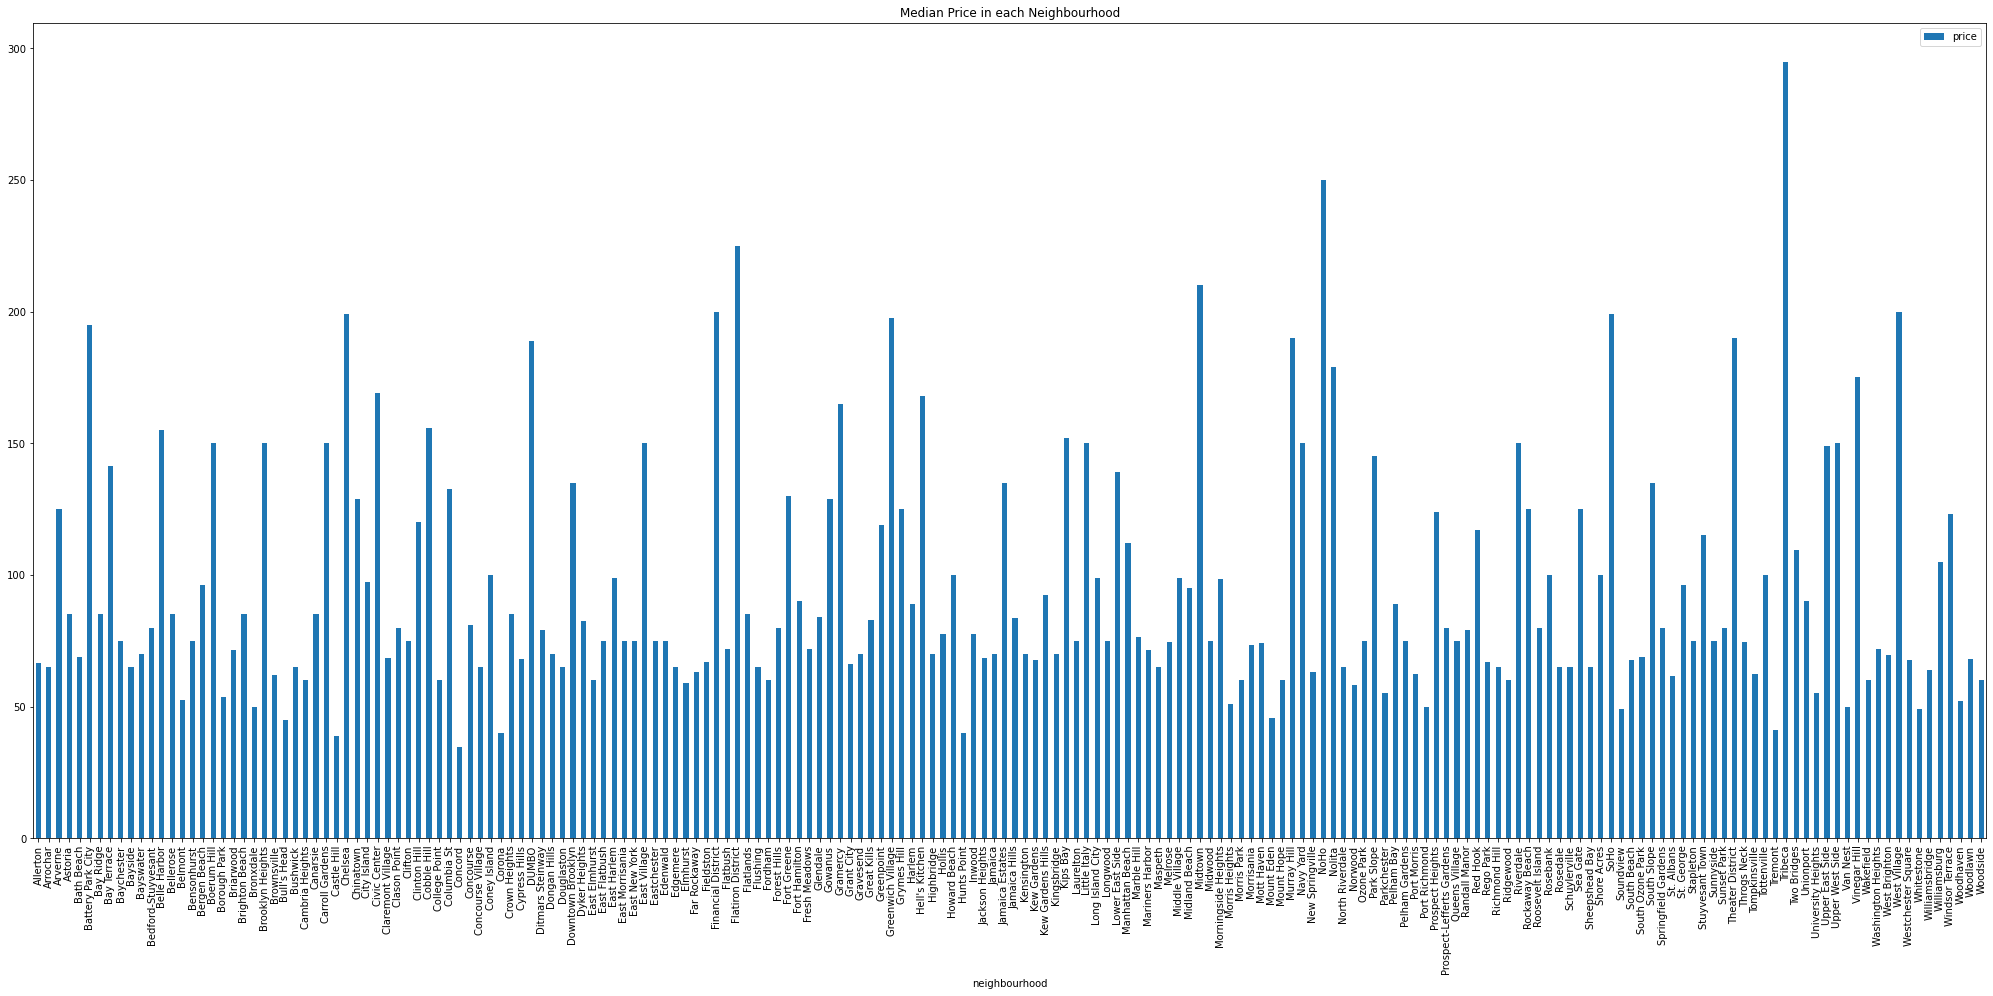

In [53]:
# Visualize the median price in each neighbourhood
graph=stats.plot.bar(y='price', figsize=(35,15))
plt.title("Median Price in each Neighbourhood")

In [54]:
# Top 5 neighbourhoods with highest median listings
top=stats.sort_values('price').tail(5)[["price"]]
top[::-1]

,price
neighbourhood,
Tribeca,295.0
NoHo,250.0
Flatiron District,225.0
Midtown,210.0
Financial District,200.0


In [55]:
# Bottom 5 neighbourhoods with highest median listings
stats.sort_values('price').head(5)[["price"]]

,price
neighbourhood,
Concord,34.5
Castle Hill,39.0
Corona,40.0
Hunts Point,40.0
Tremont,41.0


### Part b) Price variation between different neighbourhood group

Text(0.5, 1.0, 'Prices vs Neighborhood groups')

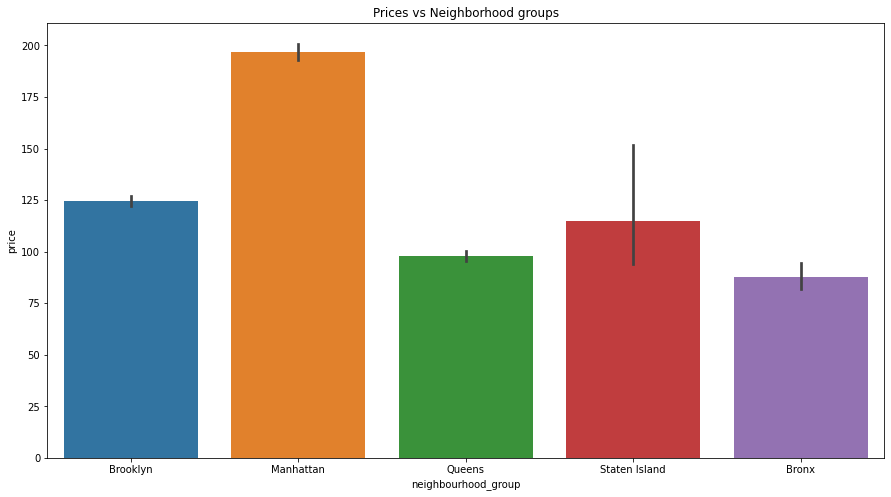

In [56]:
# Plotting the trend between price and neighborhood groups
plt.figure(figsize=(15,8))
sns.barplot(x="neighbourhood_group", y="price", data=data)
plt.title("Prices vs Neighborhood groups")

<AxesSubplot:title={'center':'Mean prices in each Borough'}, xlabel='neighbourhood_group'>

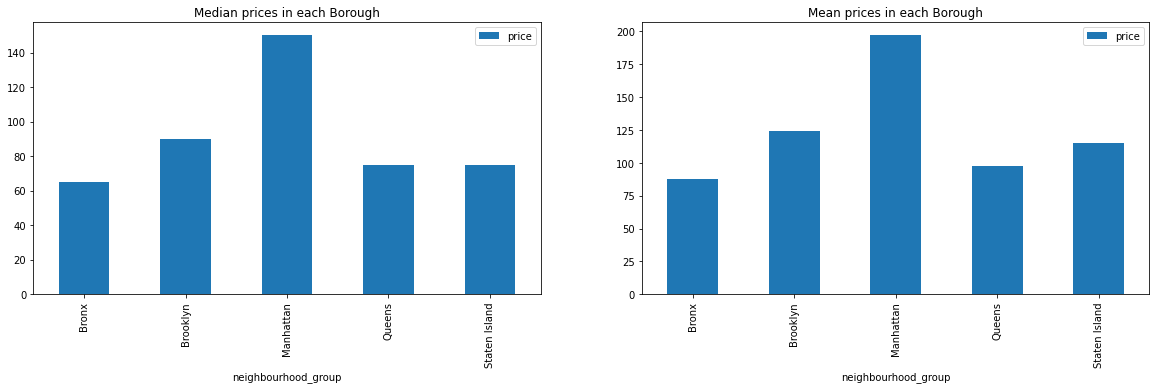

In [57]:
# Mean and median price trends also shown
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
data.groupby('neighbourhood_group').median().plot.bar(y='price', title=("Median prices in each Borough"), ax=ax1)
data.groupby('neighbourhood_group').mean().plot.bar(y='price', title=("Mean prices in each Borough"), ax=ax2)


<AxesSubplot:title={'center':'Standard deviation in prices of each Borough'}, xlabel='neighbourhood_group'>

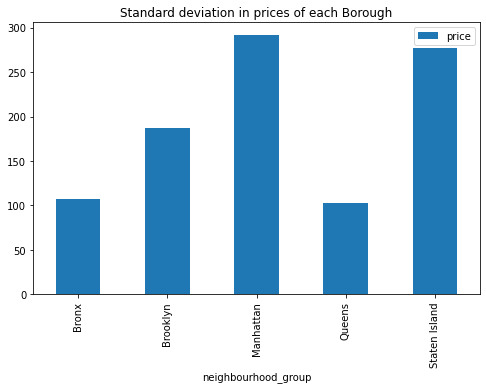

In [58]:
# Standard deviation in prices between different neighbourhood groups
data.groupby('neighbourhood_group').std().plot.bar(y='price', figsize=(8,5), title=("Standard deviation in prices of each Borough"))

## Task 3 Pearson correlation analysis

In [59]:
# Properties represented in the data frame:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

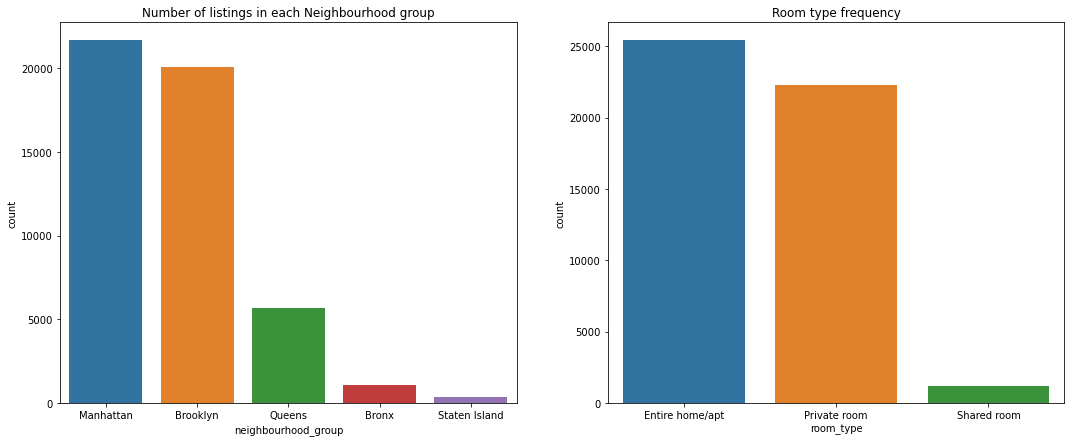

In [60]:
# id, name, host_id, host_name do not have any predictive power or effect on the other values
# longitude, latitude are values that describe the location of the listing
# However, neighbourhood_group is a better measure of location and is related to other properties more closely
# last_review is another property which should not have any effect on the others because it is just a date object
# Reviews can be described as the number of reviews received in total or monthly average. 

# Therefore I will ignore those properties and consider the remaining, which are:
# neighbourhood_group, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, 
# calculated_host_listings_count, availability_365                               



# But first we need to convert the neighbourhood_group and room_type properties to numeric values.
# This is done so a heatmap can be created with these properties. (we need numeric values)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,7))

# Listings in each borough
sns.countplot(x="neighbourhood_group", 
              data=data,
              order = data['neighbourhood_group'].value_counts().index,
              ax=ax1).set_title("Number of listings in each Neighbourhood group")

# Number of each room type
sns.countplot(x="room_type", 
              data=data, 
              order = data['room_type'].value_counts().index,
              ax=ax2).set_title("Room type frequency")
plt.show()


In [61]:
# From the first plot "Number of listings in each Neighbourhood group", we can deduce that the order of frequency is:
# Manhattan (5), Brooklyn (4), Queens (3), Bronx (2), Staten Island (1) in descreasing order 

heat_data = data.copy()

# Neighbourhood_group column mapped to integers based on number of listings in each
heat_data['neighbourhood_group'] = heat_data['neighbourhood_group'].map({'Manhattan':5,'Brooklyn':4,
                                                                         'Queens':3,'Bronx':2,
                                                                         'Staten Island':1})

# From the second plot "Room type frequency", we can deduce the order of frequency of rooms is:
# Entire home/apt (2), Private room (2), Shared room (1) in decreasing order
# Room_type column mapped to ints based on frequency of each type
heat_data['room_type'] = heat_data['room_type'].map({'Entire home/apt':3,
                                                     'Private room':2,
                                                     'Shared room':1})

Text(0.5, 1.0, 'Heatmap')

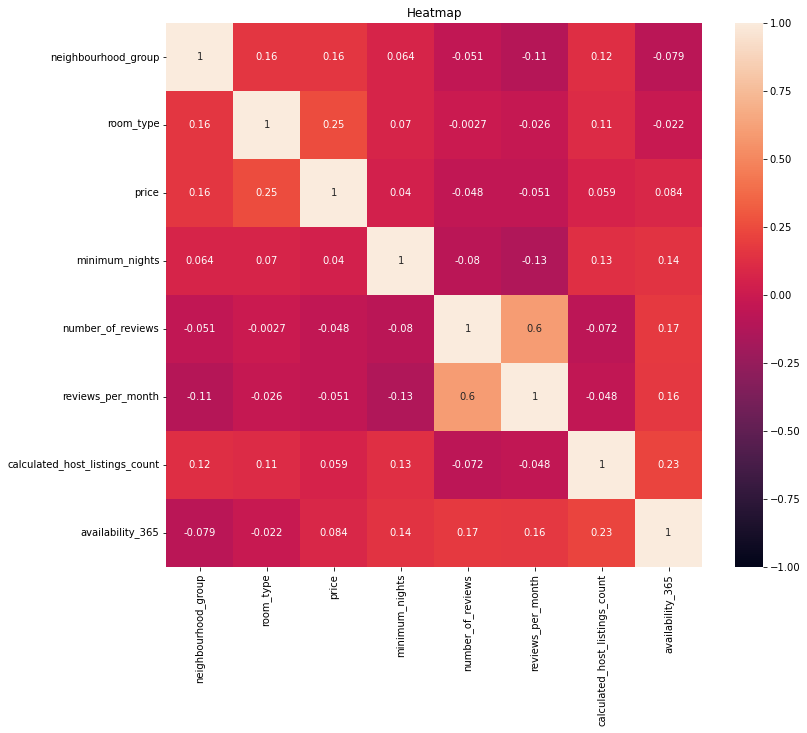

In [62]:
# Generate the heat map 
mapdata = heat_data[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 
                     'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]                                
corr = mapdata.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title("Heatmap")

In [63]:
# The most positive correlation (0.56) is between number_of_reviews and reviews_per_month.
# This is a very expected result because the greater number of reviews a listing receives in a month,
# the greater the total number of reviews it receives in total.

# The second most positive correlation (0.25) is between room_type and price. 
# This is again very understandable because entire home/apt cost greater than private rooms, 
# and private rooms cost greater than shared rooms.

# The most negative correlation (-0.12) is between minimum_nights and reviews_per_month.
# This could entail that guests do not like a high minimum night requirement.
# Listing that require the guests to book for more nights get less reviews since customers dont want to be
# forced to book for multiple nights (they might have come for a short weekend trip)

# The second most negative correlation (-0.11) is between neighbourhood_group and reviews_per_month.
# This is an interesting relation. It might be because popular boroughs like manhattan and brooklyn get busy guests,
# or people that travel often and dont leave many reviews, while staten island might get more family oriented guests.

## Task 4 Latitude and Longitude

### Part a. Scatter plot (points represent location and are color coded according to neighbourhood group)

Text(0.5, 1.0, 'Location Scatter Plot')

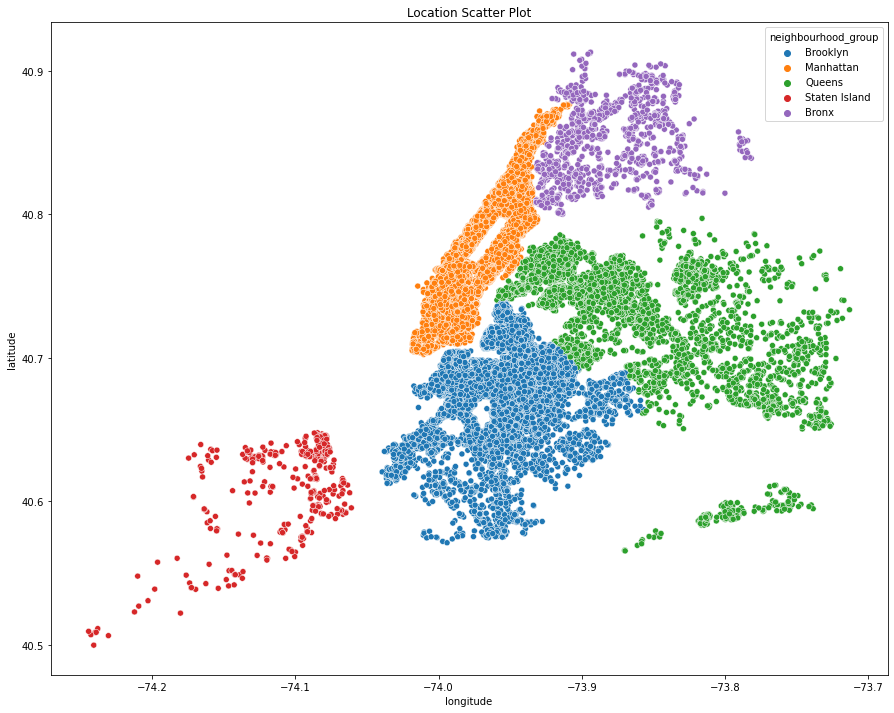

In [64]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=data.longitude, y=data.latitude, hue=data.neighbourhood_group)
plt.title("Location Scatter Plot")

### Part b. Scatter plot (points represent location and are color coded according to price)

Text(0.5, 1.0, 'Location Scatter Plot (Price color coded)')

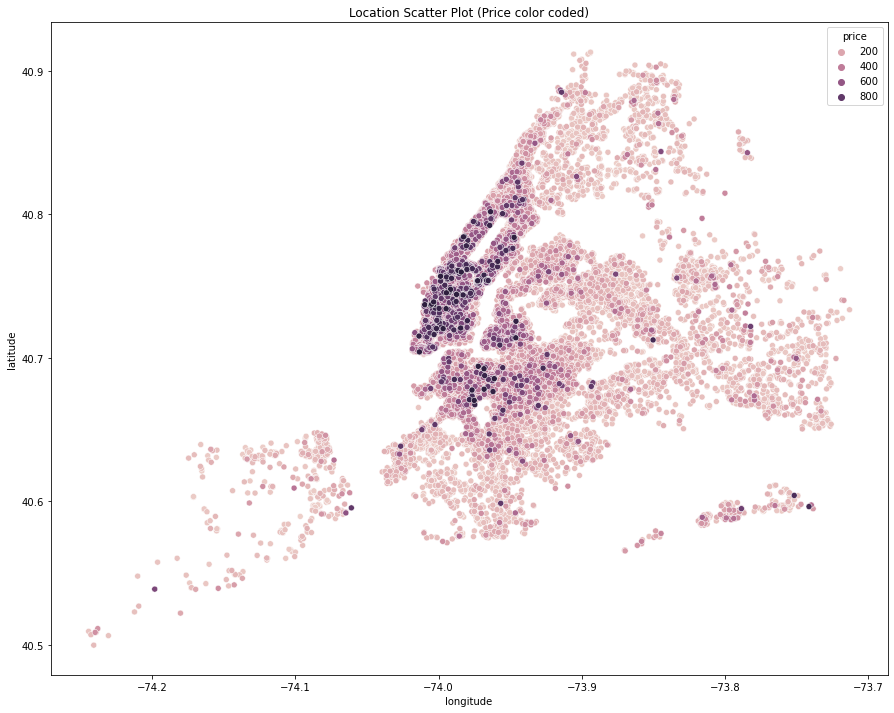

In [65]:
price_data = data[data.price <1000]
price_data = price_data.sort_values(by="price")

plt.figure(figsize=(15,12))
sns.scatterplot(data=price_data, x="longitude", y="latitude", hue="price")
plt.title("Location Scatter Plot (Price color coded)")

#### We can easily tell just by looking at both the plots that Manhattan is the most expensive neighbourhood group.

## Task 5 Word Cloud

In [66]:
# Get names of all the airbnb listings and convert them into a big string
airbnb_names = data['name'].agg(lambda x: ','.join(map(str, x)))

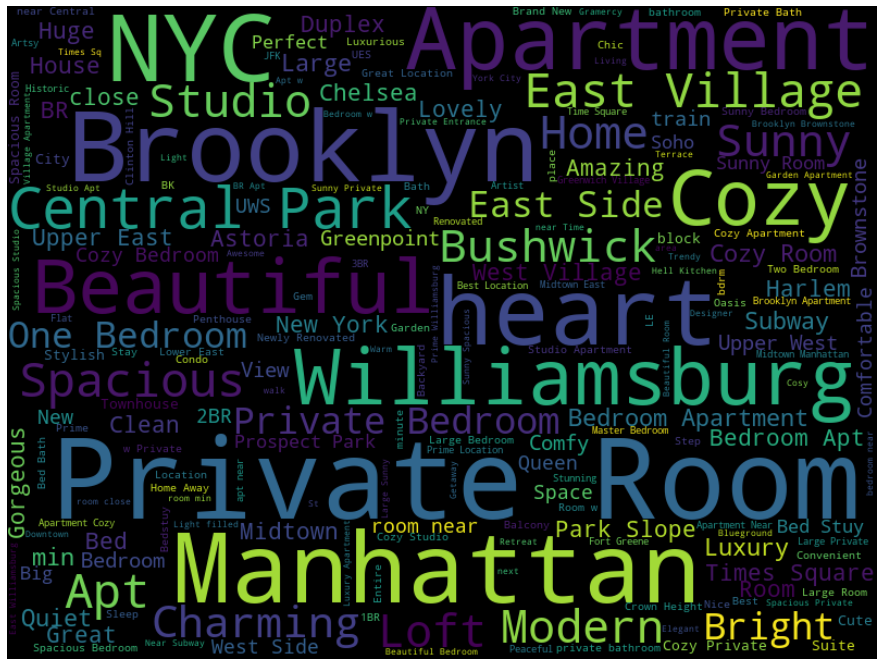

In [67]:
# Create the word cloud
cloud = WordCloud(width = 800, height = 600).generate(airbnb_names)

# Display the generated image:
plt.figure(figsize=[16,12])
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The cloud shows the frequently appearing words. Location names like Manhattan, Brooklyn, East Village, Williamsburg are common to see in listing names. 'Private room' (similarly 'studio', 'private bedroom' or 'cozy room') are other popular words. This seems appropriate because people prefer to get rooms instead of entire apartments due to the high prices in NYC. Further, we can spot some adjectives like spacious, quiet, large, charming, luxurious etc. Descriptive words are used in listing names to draw customers. It lets the guest know what to expect while highlighting the key features of the property. Lastly tourist attractions like central park and times square are also included in listing names.

## Task 6 Busiest Hosts

### Which areas have the busiest hosts

In [68]:
# Get the top 20 busiest hosts (hosts with the highest number of listings in a neighbourhood group)

# Group first by host_id, and then neighbourhood_group
# host_name is just added to display the name of the host 
# host_id and host_name will always have one same group (since they are unique)
hosts = data.groupby(["host_id", "host_name", "neighbourhood_group"])

# counting the size() will give the number of listings of each host in an area
# get the top 20
top_hosts = hosts.size().nlargest(20) 
top_hosts


# These are the TOP 20 BUSIEST HOSTS
# And it can be clearly seen that Manhattan is the area with the most busy hosts

host_id    host_name          neighbourhood_group
219517861  Sonder (NYC)       Manhattan              327
107434423  Blueground         Manhattan              230
30283594   Kara               Manhattan              121
12243051   Sonder             Manhattan               96
16098958   Jeremy & Laura     Manhattan               96
61391963   Corporate Housing  Manhattan               91
22541573   Ken                Manhattan               86
137358866  Kazuya             Queens                  79
200380610  Pranjal            Manhattan               65
1475015    Mike               Manhattan               52
7503643    Vida               Brooklyn                52
120762452  Stanley            Manhattan               50
2856748    Ruchi              Manhattan               49
205031545  Red Awning         Manhattan               49
190921808  John               Manhattan               47
2119276    Host               Manhattan               39
26377263   Stat               Brooklyn

In [69]:
# The top 10 busiest hosts are:
# 1. Sonder (NYC) -- 327 listings in Manhattan
# 2. Blueground -- 230 listings in Manhattan
# 3. Kara -- 121 listings in Manhattan
# 4. Sonder -- 96 listings in Manhattan
# 5. Jeremy & Laura -- 96 listings in Manhattan
# 6. Corporate Housing -- 91 listings in Manhattan
# 7. Ken -- 86 listings in Manhattan
# 8. Kazuya -- 79 listings in Queens
# 9. Pranjal -- 65 listings in Manhattan
# 10. Mike -- 52 listings in Manhattan

In [70]:
# Get data (all listings) of the top 10 hosts
top_hosts_id = [219517861, 107434423, 30283594, 12243051, 16098958, 61391963, 
                22541573, 137358866, 200380610, 1475015]
top_hosts_data = data.loc[data['host_id'].isin(top_hosts_id)]
top_hosts_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1386,613556,"2 BED TriBeCa, Beautiful-Renovated!",1475015,Mike,Manhattan,Tribeca,40.71655,-74.01171,Entire home/apt,130,30,2,2015-10-31,0.03,52,116
1454,652371,ELEGANT MIDTOWN EAST STUDIO E.52 ST,1475015,Mike,Manhattan,Midtown,40.75743,-73.96939,Entire home/apt,90,30,3,2016-12-31,0.05,52,358
1455,652466,32nd St & Lexington Ave / Doorman Beautiful St...,1475015,Mike,Manhattan,Kips Bay,40.74190,-73.98160,Entire home/apt,100,30,2,2018-06-30,0.04,52,342
1456,652515,COLUMBUS CIRCLE~FULLY FURNISHED!!!,1475015,Mike,Manhattan,Hell's Kitchen,40.76758,-73.98722,Entire home/apt,85,30,2,2016-08-15,0.04,52,223
1457,652648,GRAMERCY PARK~FURNISHED E.20's ST P,1475015,Mike,Manhattan,Kips Bay,40.74189,-73.97833,Entire home/apt,87,30,3,2018-08-15,0.05,52,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,NaN,0.00,232,325
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,NaN,0.00,232,338
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,NaN,0.00,232,228
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,NaN,0.00,232,188


Text(0.5, 1.0, 'Top 10 busiest hosts & their listings count')

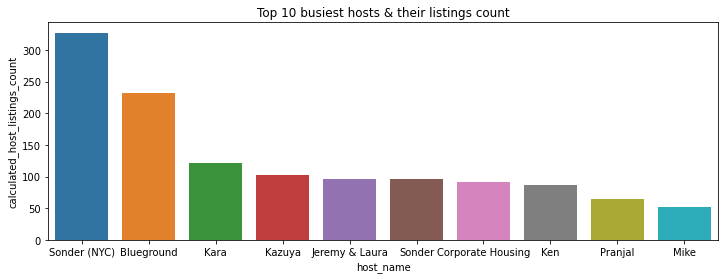

In [71]:
plt.figure(figsize=(12,4))
sns.barplot(x="host_name", 
            y="calculated_host_listings_count", 
            data=top_hosts_data.sort_values('calculated_host_listings_count', ascending=False))
plt.title("Top 10 busiest hosts & their listings count")

Text(0.5, 1.0, 'Number of busy host listings in different areas')

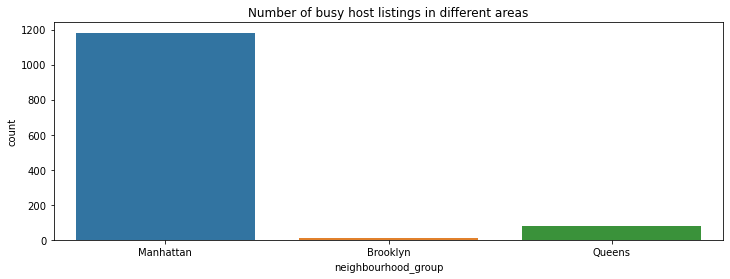

In [72]:
# This figure again reiterates that most of the busy hosts have listings in Manhattan
plt.figure(figsize=(12,4))
sns.countplot(x="neighbourhood_group", data=top_hosts_data)
plt.title("Number of busy host listings in different areas")

In [73]:
# Task 6 asks us to 'Find out which AREAS have the busiest host?'
# We have deduced that Manhattan is the area (neighbourhood_group) with the most busy hosts
# But we can further continue our investigation to find the neighbourhoods with the most busy hosts

data.groupby(["host_id", "host_name", "neighbourhood_group", "neighbourhood"]).size().nlargest(20)

host_id    host_name            neighbourhood_group  neighbourhood     
219517861  Sonder (NYC)         Manhattan            Financial District    218
7503643    Vida                 Brooklyn             Greenpoint             52
12243051   Sonder               Manhattan            Financial District     51
120762452  Stanley              Manhattan            Murray Hill            50
219517861  Sonder (NYC)         Manhattan            Murray Hill            50
205031545  Red Awning           Manhattan            Midtown                49
190921808  John                 Manhattan            Hell's Kitchen         46
30283594   Kara                 Manhattan            Hell's Kitchen         41
107434423  Blueground           Manhattan            Chelsea                37
137358866  Kazuya               Queens               Woodside               35
119669058  Melissa              Brooklyn             Bedford-Stuyvesant     34
30283594   Kara                 Manhattan            Midtow

Text(0.5, 1.0, 'Top 10 neighbourhoods with the most busy hosts')

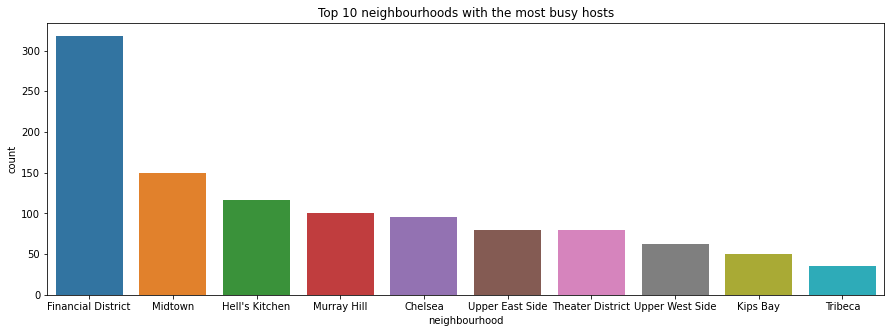

In [74]:
# The list above shows which neighbourhoods have listings from the most busy hosts
# The plot below helps us visualize that data for the top 10 neighbourhoods

plt.figure(figsize=(15,5))
sns.countplot(x="neighbourhood", 
              data=top_hosts_data, 
              order=top_hosts_data.neighbourhood.value_counts().iloc[:10].index)
plt.title("Top 10 neighbourhoods with the most busy hosts")

### Why are these hosts the busiests
##### Considers factors such as availability, price, review

Text(0.5, 1.0, 'Availability of busy hosts listings')

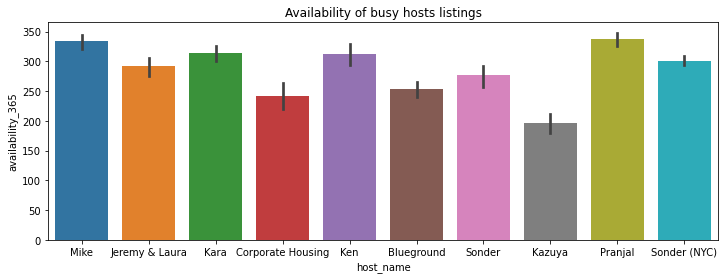

In [75]:
# Availability of busiest hosts' listings

# Majority of these listings have a high availability (>200) as the graph demonstrates 
# This means that most of these airbnbs are not occupied.
# Since these hosts are so busy in terms of having numerous properties (for exmample 1 host has 327 listings)
# it might be hard for them to update their rooms or add extra details to attract more customers.
# Another reason for high availability could be the fact that most of these listing are in 
# Manhattan which generally has a very high number of options available including hotels.

plt.figure(figsize=(12,4))
sns.barplot(x="host_name", y="availability_365", data=top_hosts_data)
plt.title("Availability of busy hosts listings")

Text(0.5, 1.0, 'Prices of busy hosts listings')

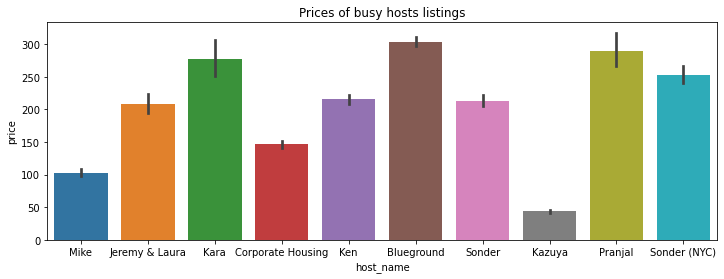

In [76]:
# Price of busiest hosts' listings

# Most of these listings have a higher price with the exception of Kazuya's listings
# This is because Kazuya has listings in Queens, while all the others are located in Manhattan
# Manhattan is generally the most expensive out the 5 boroughs of New York.

# However, still most of these listings are under $300 per night which is a very reasonable rate 
# for a property in Manhattan.

plt.figure(figsize=(12,4))
sns.barplot(x="host_name", y="price", data=top_hosts_data)
plt.title("Prices of busy hosts listings")

In [77]:
# Reasonable prices are popular in Manhattan.
# People want to save money since vacationing in Manhattan is already expensive,
# yet they do not want to live in shared rooms or extremely cheap places.
# Therefore, most people settle for the middle where they can get affordable luxury.

top_hosts_data.describe()["price"]

count    1270.000000
mean      226.777953
std       116.050638
min        24.000000
25%       164.000000
50%       221.000000
75%       271.000000
max      1170.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Number of reviews of busy hosts listings')

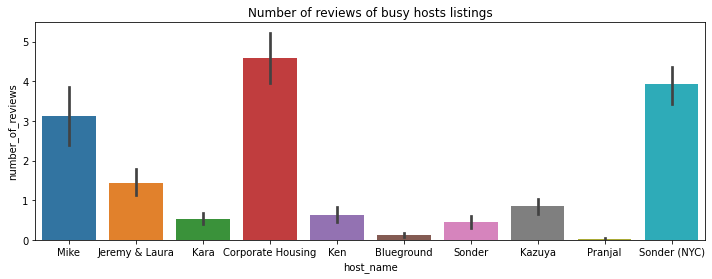

In [78]:
# Reviews of busiest hosts' listings

# Number of reviews are generally low for these listings (less than 5)
# This might be because these listings are not out of the ordinary. 
# The busy hosts have a lot of listings to manage and do not put the extra effort to 
# request guests for reviews or add extra special features to which guests would comment 
# and recommend.


plt.figure(figsize=(12,4))
sns.barplot(x="host_name", y="number_of_reviews", data=top_hosts_data)
plt.title("Number of reviews of busy hosts listings")

Text(0.5, 1.0, 'Room type of busy hosts listings')

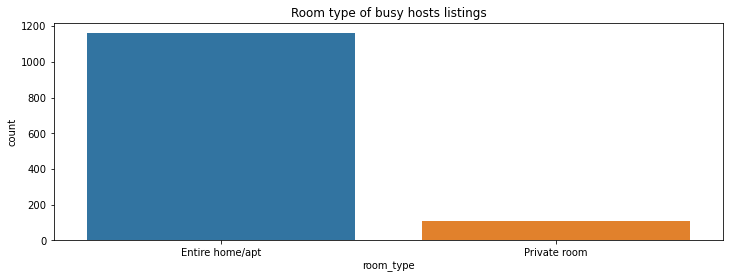

In [79]:
# Room type of busiest hosts' listings

# Most of the listings of the busy hosts are entire home/apt.
# New york is one of the busiest places and top tourist destinations in the world.
# People usually travel with either their family or friends in large groups.
# That is why customers prefer to get an entire apartment so they can all stay together
# as compared to getting hotel rooms
# Customers also appreciate the privacy they get with the entire property and no sharing with strangers.

# Further, we already know from our analysis that entire home/apt listings are more expensive
# These busy hosts can charge more for their listings as compared to single rooms.

plt.figure(figsize=(12,4))
sns.countplot(x="room_type", data=top_hosts_data)
plt.title("Room type of busy hosts listings")

Text(0.5, 1.0, 'Minimum nights requirement of busy hosts listings')

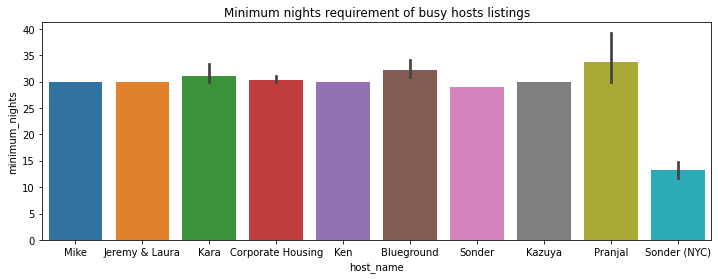

In [80]:
# Minimum nights of busiest hosts' listings

# Almost all the busy hosts have a common threshold requirement for minimum number of nights that can be booked
# All require around 30 nights at least. This means that these listings are 1 month rentals
# Therefore, the busy hosts only need to find one customer/guest in one month and then not worry about their listing
# This makes it easy to handle multiple properties.

plt.figure(figsize=(12,4))
sns.barplot(x="host_name", y="minimum_nights", data=top_hosts_data)
plt.title("Minimum nights requirement of busy hosts listings")

Text(0.5, 1.0, 'Heatmap for top hosts')

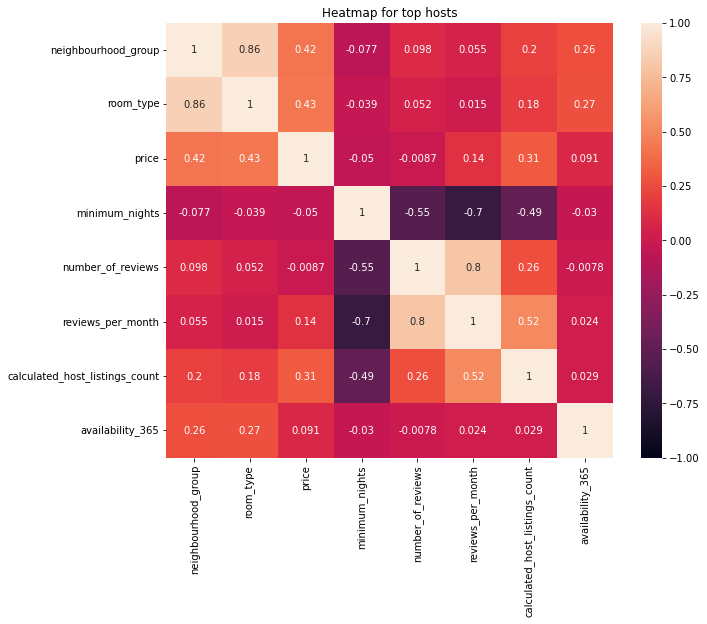

In [81]:
# Correlation of other factors (heat map drawn similar to Task 3)

corr_data = top_hosts_data.copy()
corr_data['neighbourhood_group'] = corr_data['neighbourhood_group'].map({'Manhattan':5, 'Brooklyn':4,'Queens':3, 
                                                                         'Bronx':2,'Staten Island':1})
corr_data['room_type'] = corr_data['room_type'].map({'Entire home/apt':3,'Private room':2,'Shared room':1})

heat_data = corr_data[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 
                     'reviews_per_month', 'calculated_host_listings_count', 'availability_365']] 
corr = heat_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title("Heatmap for top hosts")

In [82]:
# Interesting observations from heatmap

# High positive correlation b/w neighbourhood_group and room_type (0.86)
# This is expected because different areas in NYC, get different types of travellers
# For example the financial district in Manhattan with career oriented individuals who want entire apt 
# vs Williamsburg with younger generation or artists etc who would prefer shared rooms or private rooms

# Highly negative correlation b/w minimum_nights and reviews_per_month (-0.84)
# The greater the number of nights required to book the listings, the less the number of reviews
# which as discussed above is understandble because people don't want to be forced to book a lot of nights

# Highly positive correlation b/w reviews_per_month and calculated_host_listings_count (0.78)
# The more the number of listings the host has, the more loyal customers it has that leave more reviews
# The busy hosts also have more experience and might spend more time and money to advertise their many listings
# and ask their guests for reviews

## Task 7 (Two interesting plots)

### Interesting find #1

Text(0.5, 1.0, 'Room type percentage')

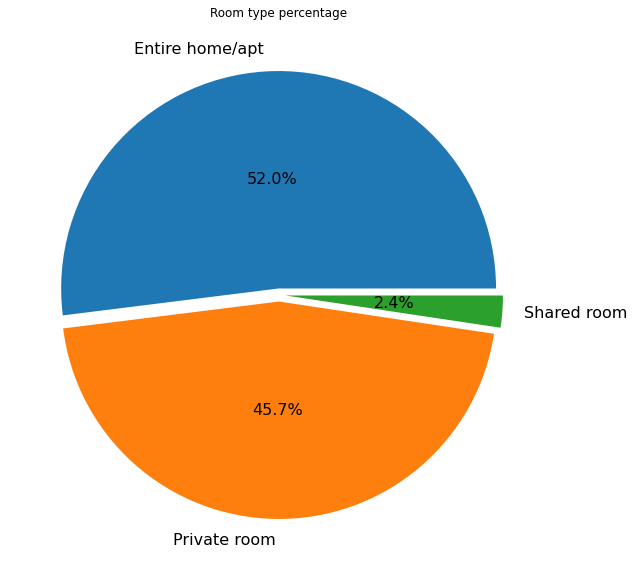

In [83]:
# Analyze what percentage is each type of room (entire home/apt, private or shared room)

# The pie chart below is a great visual proof of the fact that almost 52% of the listings are 
# offering properties that are booked as Entire home/apartments

labels = data['room_type'].value_counts().index
rooms = data['room_type'].value_counts().values
plt.figure(figsize=(10,10))
plt.pie(rooms, labels=labels, autopct='%1.1f%%', explode=[0.03]*3, pctdistance=0.5, textprops={'fontsize': 16})
plt.title("Room type percentage")

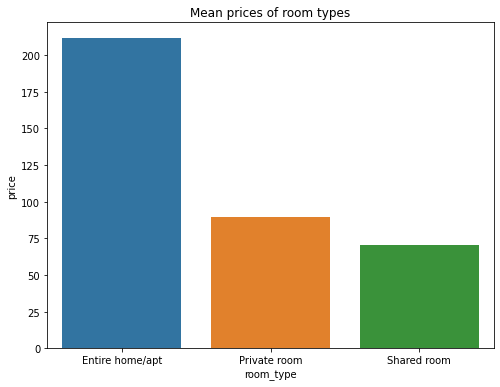

In [84]:
# We can see that entire home/apt listings have the highest average price
# While shared rooms have the lowest average price

plt.figure(figsize=(8,6))
type_price= data.groupby('room_type', as_index=False)[['price']].mean()
sns.barplot(x=type_price.room_type, y=type_price.price)
plt.title("Mean prices of room types");

Text(0.5, 1.0, 'Room_type Price Share')

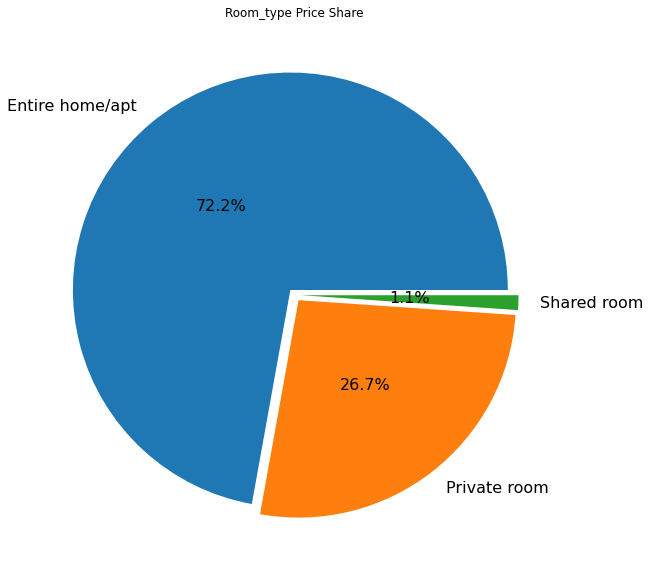

In [85]:
# We have concluded that the room type entire home/apt is the most frequent and the most expensive
# Therefore we can deduce that most of the income generated through the airbnb industry in NYC in 2019
# came from entire home/apt listings

labels = data['room_type'].value_counts().index
roomtype_share =  data.groupby("room_type")['price'].sum()
plt.figure(figsize=(10,10))
plt.pie(roomtype_share, labels=labels, autopct='%1.1f%%', explode=[0.03]*3, pctdistance=0.5, textprops={'fontsize': 16})
plt.title("Room_type Price Share")


# The graph below shows that 72% of the price share of the airbnb industry in 2019 came from entire home/apt listings

Text(0.5, 1.0, 'Neighbourhood Price Share')

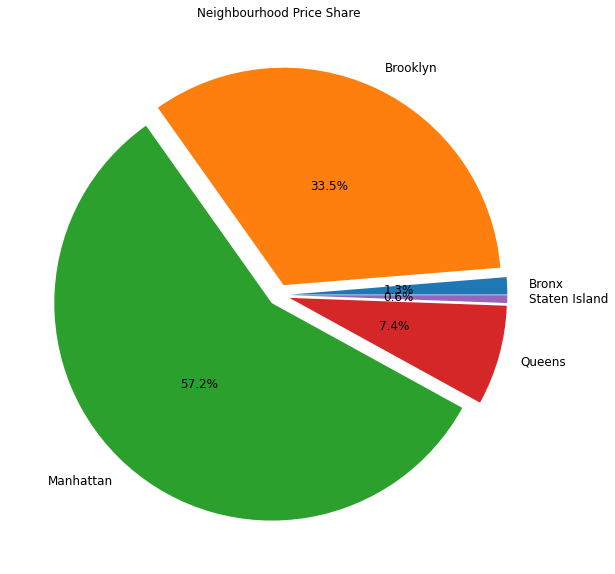

In [86]:
# Similarly Analyze the percentage income generated by each neighbourhood group

# The piechart below shows that 57% of the total price is being generated by Manhattan 
# then Brooklyn, then Queens, then Bronx and then Staten Island

labels = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
area_share =  data.groupby("neighbourhood_group")['price'].sum()
plt.figure(figsize=(10,10))
plt.pie(area_share, labels=labels, autopct='%1.1f%%', explode=[0.05]*5, pctdistance=0.5, textprops={'fontsize': 12})
plt.title("Neighbourhood Price Share")

### Interesting find #2

Text(0.5, 1.0, 'Availability of each room type in each neighbourhood')

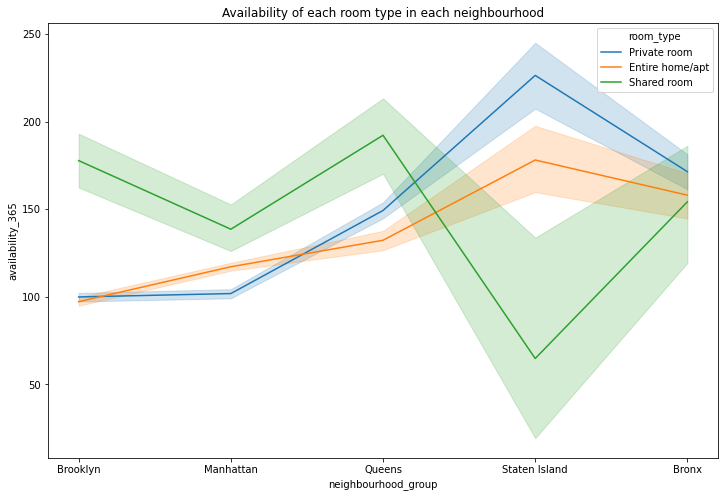

In [87]:
# Here we analyze the availability of each room type in each neighbourhood 

plt.figure(figsize=(12,8))
sns.lineplot(x=data.neighbourhood_group, y=data.availability_365, hue=data.room_type)
plt.title('Availability of each room type in each neighbourhood')

In [88]:
# Some interesting factors observed in above graph:

# Staten Island has the least availability of shared rooms, and 
# the highest availabilty of entire home/apt and private rooms.

# Staten Island is mostly a residential borough with properties like houses instead of 
# apartment complexes or buildings.
# Therefore, hosts usually either rent out their entire place or a private room in their house.
# However, Staten Island is not a big tourist destination and that is why people prefer to rather
# stay in Manhattan or Brooklyn. This explains the high availabilty rate of entire home/apt, private rooms
# in Staten Island who gets less customers. 
# On the other hand, there arent many shared room listings in staten island (only 9 listings)
# Since there are only 9 listings available, and we know shared rooms are cheaper,
# they have the least availability (maybe because they are always occupied or maybe 
# because the host doesn't want to rent a room in their house too often)

len(data.loc[(data.neighbourhood_group == 'Staten Island') & (data.room_type == 'Shared room')])


9

In [89]:
# Another interesting observation is that Manhattan, Brooklyn and Queens
# have the highest availabilty for shared rooms.
# This is quite understandable because most people (guests) are not ready to compromise
# on their privacy.
# Shared rooms are usually booked by a certain niche such as college students or people travelling
# on a small budget who dont mind sharing the room with a stranger.
# Shared rooms also compromise security because you need to be able to trust the stranger to leave your
# belongings and luggage in the room with them.



# Also we can see that Brooklyn and Manhattan have very similar availabilites.
# This goes to show that these two neighbourhoods are the most popular, and have the same trend
# with least availabilty of rentals in general. 

Text(0.5, 1.0, 'Availabilty of room types of different price range')

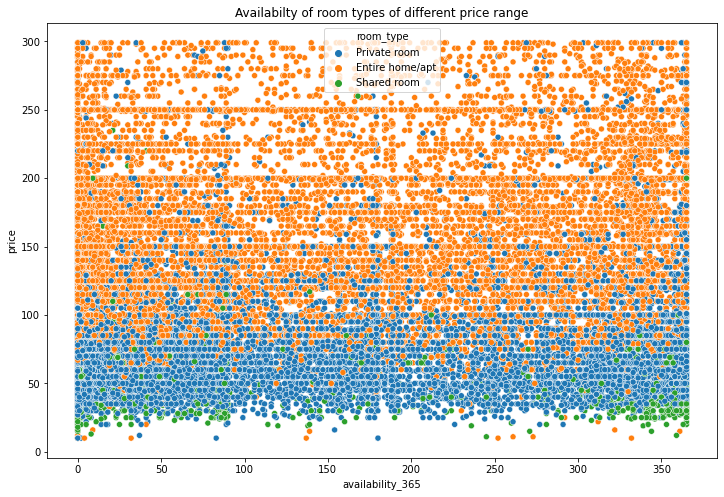

In [90]:
# Availabilty of room types


# The figure below has a uniform distribution, and it shows that rooms of every type and every price  
# range are available throughout.

plt.figure(figsize=(12,8))
sns.scatterplot(data=data[data.price < 300], x="availability_365", y='price', hue='room_type')
plt.title("Availabilty of room types of different price range")

Text(0.5, 1.0, 'Minimum night requirement in each borough')

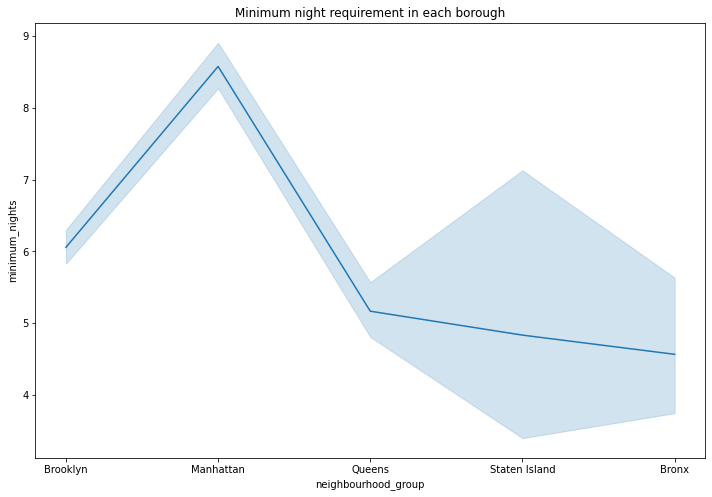

In [91]:
# Minimum night requirement in each neighbourhood group

plt.figure(figsize=(12,8))
sns.lineplot(x=data.neighbourhood_group, y=data.minimum_nights)
plt.title("Minimum night requirement in each borough")

In [92]:
# This graph shows that Manhattan, Brooklyn and Queens generally have a tight range of
# minimum night requirement in all its listings. Staten Island and the Bronx have a wider
# range of requirements available, meaning they are more flexible.

# Manhattan has the highest minimum night requirement. Brooklyn and Queens have similar
# requirements and Bronx has the least.
# However, it can be noted that generally all the borough have a low minimum night requirement (<9)